In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import math

In [2]:
data = pd.read_excel('D02_Boston.xlsx', engine='openpyxl')
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 200, random_state = 0)

regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)#training the model

In [5]:
#predictions
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

In [6]:
#metrics
mse_train = mean_squared_error(Y_train, Y_pred_train)
rmse_train = math.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_pred_train)

mse_test = mean_squared_error(Y_test, Y_pred_test)
rmse_test = math.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_pred_test)

In [7]:
print('Metrics in train datased:')
print('rmse %.4f'%rmse_train, 'r2 %.4f'%r2_train,'\n')
print('Metrics in test datased:')
print('rmse %.4f'%rmse_test, 'r2 %.4f'%r2_test,'\n')

Metrics in train datased:
rmse 4.4738 r2 0.7672 

Metrics in test datased:
rmse 5.0739 r2 0.6851 



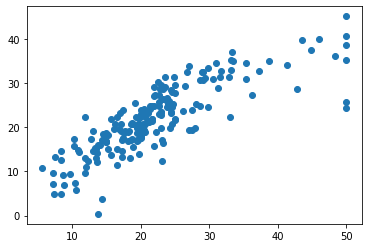

In [8]:
plt.scatter(x = Y_test, y = Y_pred_test)

In [9]:
#adjusting the scale of attributes
transformer = StandardScaler()
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [10]:
#using polynomial regressor 

print(' POLYNOMIAL REGRESSOR \n ')
print(' K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST')
print('---    ----------     --------    ---------    -------')

for k in range(1,6):
    polyFeat = PolynomialFeatures(degree = k)
    
    polyFeat = polyFeat.fit(X_train)
    X_train_poly = polyFeat.transform(X_train)
    X_test_poly = polyFeat.transform(X_test)
    
    regressor = LinearRegression()
    regressor = regressor.fit(X_train_poly, Y_train)#training the model
    
    Y_pred_train = regressor.predict(X_train_poly)
    Y_pred_test = regressor.predict(X_test_poly)
    
    #train
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(Y_train, Y_pred_train)
    
    #test
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    print('%3d %12.4f %12.4f %12.4f %12.4f' %(k, rmse_train, r2_train, rmse_test, r2_test))

 POLYNOMIAL REGRESSOR 
 
 K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST
---    ----------     --------    ---------    -------
  1       4.4738       0.7672       5.0739       0.6851
  2       1.9288       0.9567       4.1688       0.7874
  3       0.0000       1.0000      46.7599     -25.7434
  4       0.0000       1.0000      23.1345      -5.5462
  5       0.0000       1.0000     231.6847    -655.5440


In [21]:
#using polynomial regressor with ridge regularizer

print(' POLYNOMIAL REGRESSOR WITH RIDGE REGULARIZER \n ')
print(' K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST')
print('---    ----------     --------    ---------    -------')

for k in range(1,4):
    polyFeat = PolynomialFeatures(degree = k)
    
    polyFeat = polyFeat.fit(X_train)
    X_train_poly = polyFeat.transform(X_train)
    X_test_poly = polyFeat.transform(X_test)
    
    regressor_ridge = Ridge(alpha = 50.0)
    regressor_ridge = regressor_ridge.fit(X_train_poly, Y_train)#training the model
    
    Y_pred_train = regressor_ridge.predict(X_train_poly)
    Y_pred_test = regressor_ridge.predict(X_test_poly)
    
    #train
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(Y_train, Y_pred_train)
    
    #test
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    print('%3d %12.4f %12.4f %12.4f %12.4f' %(k, rmse_train, r2_train, rmse_test, r2_test))

 POLYNOMIAL REGRESSOR WITH RIDGE REGULARIZER 
 
 K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST
---    ----------     --------    ---------    -------
  1       4.6244       0.7513       5.1702       0.6731
  2       2.6151       0.9205       3.9355       0.8106
  3       1.7037       0.9662       3.6518       0.8369


In [22]:
#using polynomial regressor with lasso regularizer

print(' POLYNOMIAL REGRESSOR WITH RIDGE REGULARIZER \n ')
print(' K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST')
print('---    ----------     --------    ---------    -------')

for k in range(1,4):
    polyFeat = PolynomialFeatures(degree = k)
    
    polyFeat = polyFeat.fit(X_train)
    X_train_poly = polyFeat.transform(X_train)
    X_test_poly = polyFeat.transform(X_test)
    
    regressor_lasso = Lasso(alpha = 0.1, max_iter = 100000)
    regressor_lasso = regressor_lasso.fit(X_train_poly, Y_train)#training the model
    
    Y_pred_train = regressor_lasso.predict(X_train_poly)
    Y_pred_test = regressor_lasso.predict(X_test_poly)
    
    #train
    mse_train = mean_squared_error(Y_train, Y_pred_train)
    rmse_train = math.sqrt(mse_train)
    r2_train = r2_score(Y_train, Y_pred_train)
    
    #test
    mse_test = mean_squared_error(Y_test, Y_pred_test)
    rmse_test = math.sqrt(mse_test)
    r2_test = r2_score(Y_test, Y_pred_test)
    
    print('%3d %12.4f %12.4f %12.4f %12.4f' %(k, rmse_train, r2_train, rmse_test, r2_test))

 POLYNOMIAL REGRESSOR WITH RIDGE REGULARIZER 
 
 K     RMSE TRAIN     R2 TRAIN    RMSE TEST    R2 TEST
---    ----------     --------    ---------    -------
  1       4.5217       0.7622       5.1420       0.6766
  2       2.6526       0.9182       3.9817       0.8061
  3       2.0460       0.9513       3.7026       0.8323
